# Plotting with GeoJSON

GeoJSON adalah format data geospasial yang dirilis tahun 2016. Tidak seperti Shapefile yang menggunakan multiple files, GeoJSON menggunakan single file yang membuatnya lebih efisien digunakan. 

File GeoJSON lebih mudah dibaca dibandingkan shapefile 
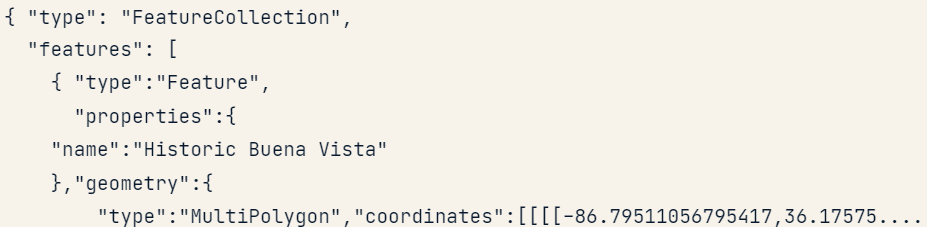

gambar diatas adalah susunan barus awal dalam file GeoJSON. GeoJSON mendukung berbagai object geometry seperi MultiPoint, MultiStringLine dan MultiPolygon.  

In [1]:
import geopandas as gpd

In [3]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('neighborhoods.geojson')

In [4]:
neighborhoods.head()

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,West Meade,"MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ..."
4,White Bridge,"MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ..."


### Geopandas Dependencies

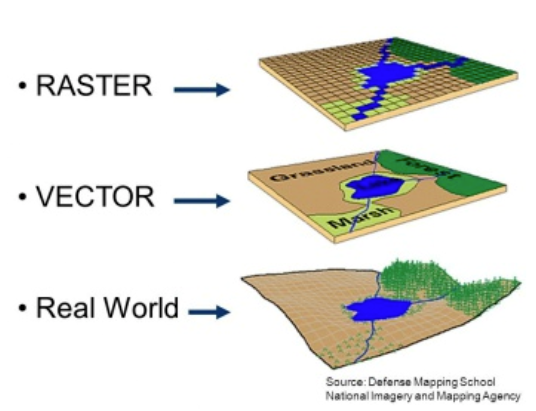

- data vektor > jenis data geospasial yang mewakili 3 object geometry yaitu titik, garis dan bidang.
- data raster > dianggap sebagai grid contohnya peta totpgrafi dari raster

Selain library geopandas, library fiona dan GDAL/OGR membantu geopandas untuk mengolah data spasial.
- fiona, menghubungkan Open GIS Simple Features References (OGR) ke python dan geopandas
    - GDAL untuk mengubah format raster
    - OGR untuk mgnubah format vector
    

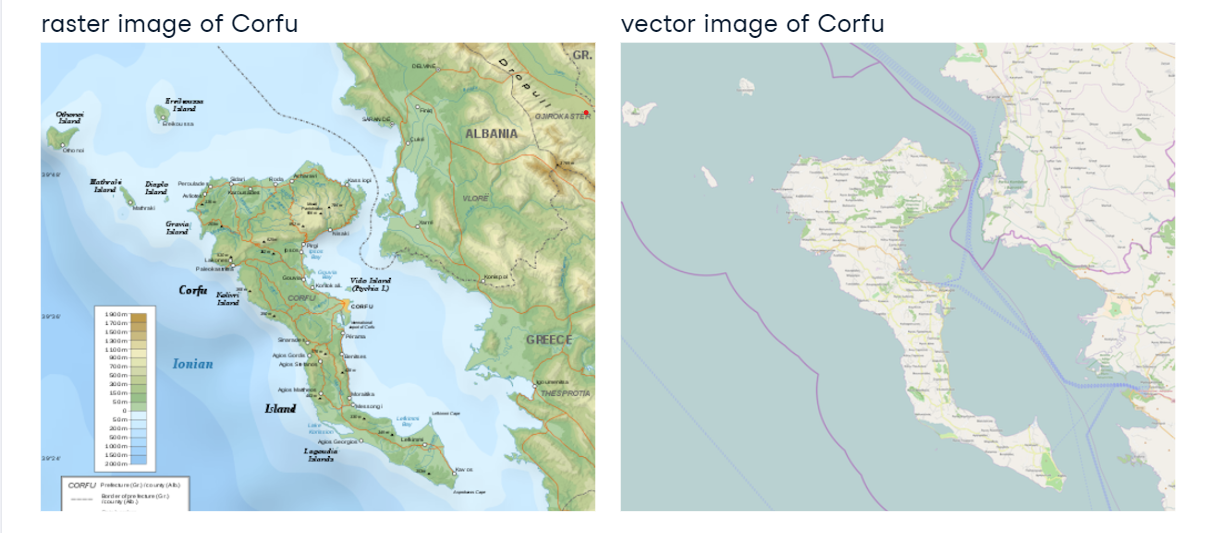

disebelah kiri gambar Corfu teridi dari grid yang memberikan texture gambar 3D. Sebelah kanan terdiri dari titik garis dan polygon

## colormaps

Saat kita memetakan wilayah tanpa ada hubungan kuantitatif, peta warna kualitatif adalah solusinya.
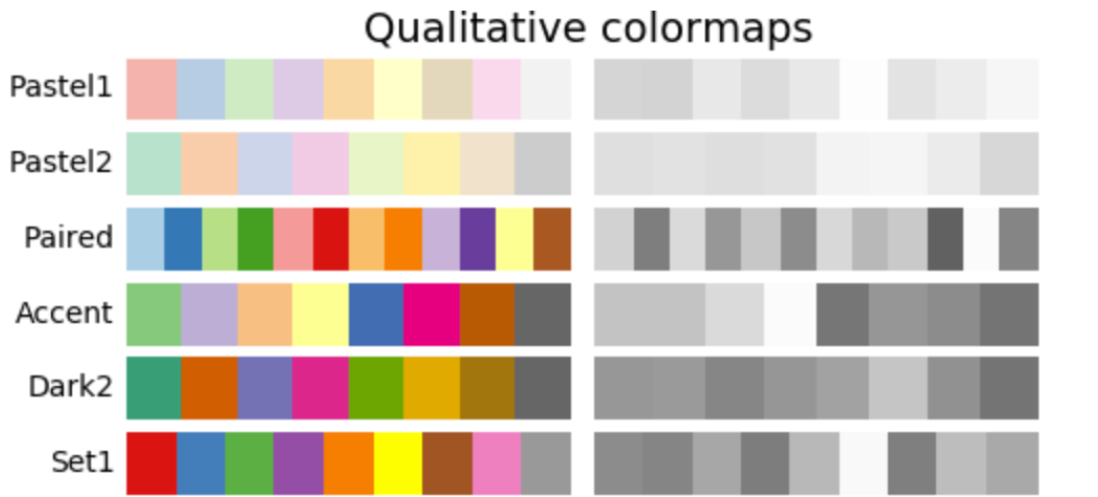

## Plotting woth Color

In [6]:
school_districs = gpd.read_file('school_districts.geojson')

In [7]:
school_districs.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


<Axes: >

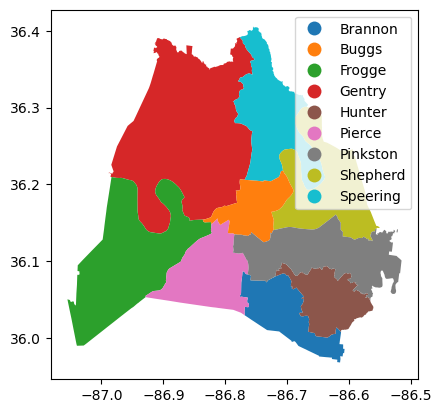

In [8]:
school_districs.plot(column = 'last_name', 
                    legend = True)

<Axes: >

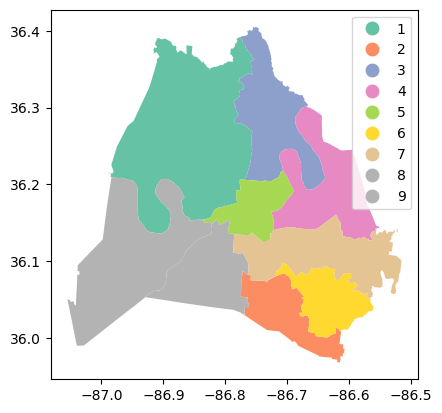

In [11]:
school_districs.plot(column = 'district', 
                     cmap = 'Set2',
                    legend = True)

### Exercise

**Colormaps**

When you want to differentiate regions, but not imply any type of relationship between the regions, a qualitative colormap is the best choice. In this exercise you'll compare a qualitative colormap to a sequential (quantitative) colormap using the school districts GeoDataFrame, which is available for you as school_districts.

- Plot school_districts with the tab20 colormap. Use 'district' to create a legend and set legend_kwds = lgnd_kwds.

In [14]:
import matplotlib.pyplot as plt

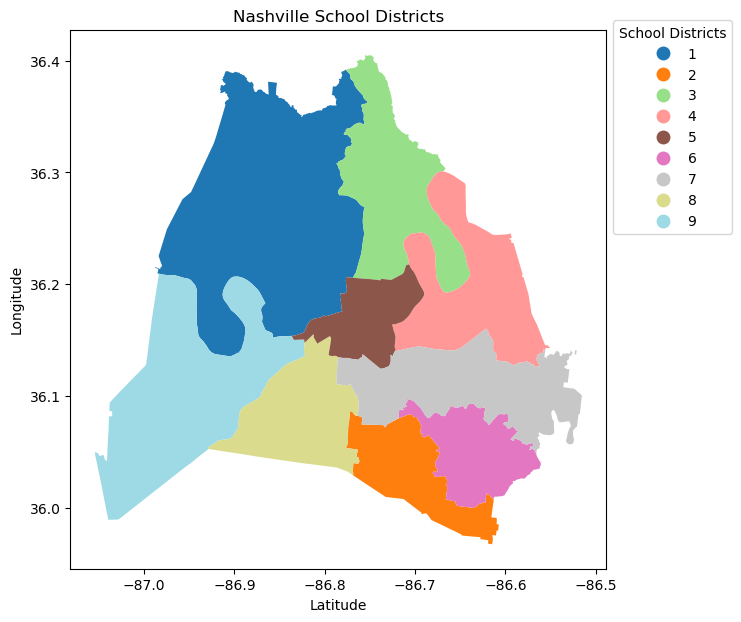

In [15]:

# set legend style
lgnd_kwds = {'title': 'School Districts', 'loc': 'upper left',
             'bbox_to_anchor': (1, 1.03), 'ncol':1}

# Plot the school districts using the tab20 colormap (qualitative)
school_districs.plot(column='district', cmap='tab20', legend=True, legend_kwds=lgnd_kwds, figsize=(7,7));
plt.xlabel('Latitude');
plt.ylabel('Longitude');
plt.title('Nashville School Districts');

- Plot school_districts with the sequential summer colormap. Keep the other arguments as they are.

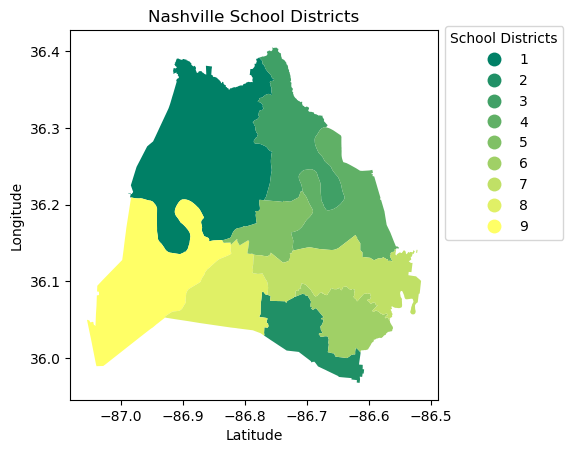

In [17]:
# Plot the school districts using the summer colormap (sequential)
school_districs.plot(column='district', cmap='summer', legend=True, legend_kwds=lgnd_kwds);
plt.xlabel('Latitude');
plt.ylabel('Longitude');
plt.title('Nashville School Districts');

- Plot the school districts without setting the column. Use the qualitative Set3 colormap and set legend = True.

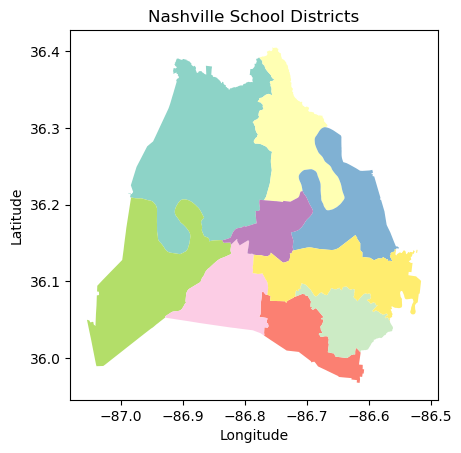

In [18]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using Set3 colormap without the column argument
school_districs.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville School Districts')
plt.show();

> There is no legend when the column argument is not supplied even if you set legend to True!

**Map Nashville neighborhoods**

This time you'll read a GeoJSON file in to a GeoDataFrame to take a quick peek at where Nashville neighborhoods are.

- Import geopandas and matplotlib.pyplot using the customary aliases.

                   name                                           geometry
0  Historic Buena Vista  MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...
1        Charlotte Park  MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ...
2              Hillwood  MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ...
3            West Meade  MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ...
4          White Bridge  MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ...


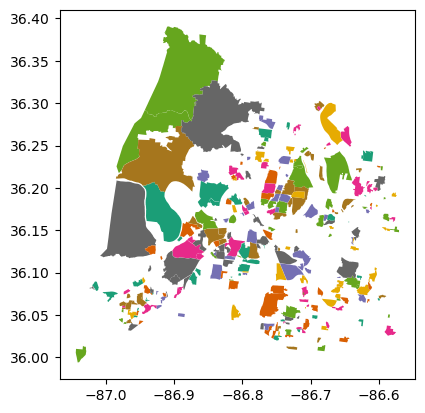

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('neighborhoods.geojson')

# Print the first few rows of neighborhoods
print(neighborhoods.head())

# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column = 'name', cmap = 'Dark2')

# Show the plot.
plt.show()

> Whoa! That's a lot of neighborhoods! How will we find one to stroll through and look at public art?

# Projections and Coordinates References Systems

## Projections

Proyeksi peta diperlukan untuk merpresentasikan permukaan bumi ke dalam bentuk 2D 
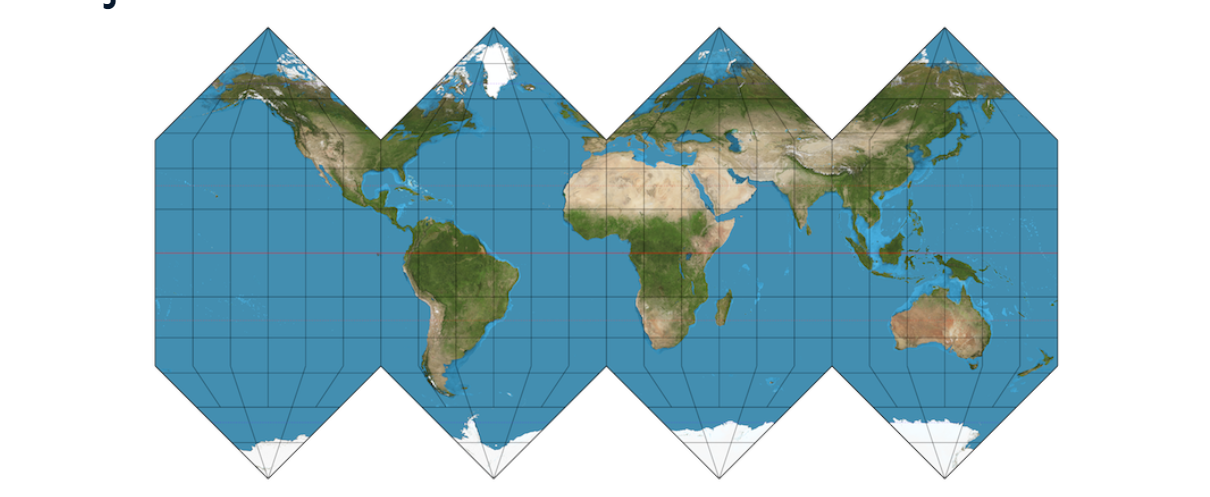
- proyeksi yang paling umum digunakaan adalah proyeksi mercator yang dikenal sebagai WGS84, dimana menjadi standar pengukuran dunia untuk berbagai aplikasi seperti pemetaan dan GPS. 

### Coordinate References Systems

- EPSG: 4326
    - Digunakan oleh Google Earth 
    - satuan Decimal Degress

- EPSG: 3857
    - Digunakan oleh Google Maps, OSM 
    - satuan meter

keduanya menggunakan WGS84. 

### Create Geometry Columns

In [25]:
import pandas as pd

In [26]:
# Buat DataFrame dengan data contoh
data = {
    'StopID': ['4432', '588', '590', '541'],
    'StopName': [
        'MUSIC CITY CENTRAL 5TH - BAY 11',
        'CHARLOTTE AVE & 7TH AVE N WB',
        'CHARLOTTE AVE & 8TH AVE N WB',
        '11TH AVE / N GULCH STATION OUTBOUND',
    ],
    'Latitude': [36.16659, 36.165, 36.164393, 36.162249],
    'Longitude': [-86.781996, -86.78406, -86.785451, -86.790464],
}

# Buat DataFrame
df = pd.DataFrame(data)


In [27]:
df

,StopID,StopName,Latitude,Longitude
0,4432,MUSIC CITY CENTRAL 5TH - BAY 11,36.166590,-86.781996
1,588,CHARLOTTE AVE & 7TH AVE N WB,36.165000,-86.784060
2,590,CHARLOTTE AVE & 8TH AVE N WB,36.164393,-86.785451
3,541,11TH AVE / N GULCH STATION OUTBOUND,36.162249,-86.790464


In [29]:
# membuat object geomtery point
from shapely.geometry import Point 

df['geometry'] = df.apply(lambda x : Point ((x.Longitude, x.Latitude)),
                         axis = 1)

df.head()

,StopID,StopName,Latitude,Longitude,geometry
0,4432,MUSIC CITY CENTRAL 5TH - BAY 11,36.166590,-86.781996,POINT (-86.781996 36.16659)
1,588,CHARLOTTE AVE & 7TH AVE N WB,36.165000,-86.784060,POINT (-86.78406 36.165)
2,590,CHARLOTTE AVE & 8TH AVE N WB,36.164393,-86.785451,POINT (-86.785451 36.164393)
3,541,11TH AVE / N GULCH STATION OUTBOUND,36.162249,-86.790464,POINT (-86.790464 36.162249)


In [31]:
# membuat sistem koordinat 
df_crs = {'init' : 'epsg:4326'}

# membuat geodataframe
df_geo = gpd.GeoDataFrame(df,
                         crs = df_crs,
                         geometry = df.geometry)

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [32]:
df_geo.head()

,StopID,StopName,Latitude,Longitude,geometry
0,4432,MUSIC CITY CENTRAL 5TH - BAY 11,36.166590,-86.781996,POINT (-86.78200 36.16659)
1,588,CHARLOTTE AVE & 7TH AVE N WB,36.165000,-86.784060,POINT (-86.78406 36.16500)
2,590,CHARLOTTE AVE & 8TH AVE N WB,36.164393,-86.785451,POINT (-86.78545 36.16439)
3,541,11TH AVE / N GULCH STATION OUTBOUND,36.162249,-86.790464,POINT (-86.79046 36.16225)


## Convert Coordinates Systems

In [33]:
df_geo.geometry = df_geo.geometry.to_crs(epsg = 3857)
df_geo.head(2)

,StopID,StopName,Latitude,Longitude,geometry
0,4432,MUSIC CITY CENTRAL 5TH - BAY 11,36.16659,-86.781996,POINT (-9660527.605 4323568.177)
1,588,CHARLOTTE AVE & 7TH AVE N WB,36.16500,-86.784060,POINT (-9660757.368 4323348.934)


### Exercise 

**Changing coordinate reference systems**

In this exercise you will learn how to find a GeoDataFrame's coordinate reference system and how to change it. The school districts GeoDataFrame is available as school_districts.

- Print the first row of school_districts and the crs property of this GeoDataFrame.
- Convert the coordinate reference system of school_districts to epsg:3857.
- Print the crs property again to confirm that it was changed.

In [34]:
# Print the first row of school districts GeoDataFrame and the crs
print(school_districs.head(1))
print(school_districs.crs)

# Convert the crs to epsg:3857
school_districs.geometry = school_districs.geometry.to_crs(epsg=3857)

# Print the first row of school districts GeoDataFrame and the crs
print(school_districs.head(1))
print(school_districs.crs)

   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  
EPSG:4326
   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-9659344.056 4353528.767, -965...  
EPSG:3857


> Nicely done! You can change the coordinate reference system of a GeoDataFrame by changing the crs property of the GeoDataFrame. Notice that the units for geometry change when you change the CRS. You always need to ensure two GeoDataFrames share the same crs before you spatially join them.

**Construct a GeoDataFrame from a DataFrame**

In this exercise, you will construct a geopandas GeoDataFrame from the Nashville Public Art DataFrame. You will need to import the Point constructor from the shapely.geometry module to create a geometry column in art before you can create a GeoDataFrame from art. This will get you ready to spatially join the art data and the neighborhoods data in order to discover which neighborhood has the most art.

The Nashville Public Art data has been loaded for you as art.

- Import Point from the shapely.geometry module.
- Print the head() of the art data.
- Complete the code for a lambda expression that will create a Point geometry column from the lng and lat columns in art. Remember that longitude comes first!
- Build a GeoDataFrame using art and call it art_geo. Set crs equal to neighborhoods.crs and set geometry equal to the column you just created. Print the type() of art_geo to verify it is a GeoDataFrame.

In [35]:
art = gpd.read_file('public_art.csv')

In [36]:
art.head()

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,,36.12856,-86.8366,"(36.12856, -86.8366)",None
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",,Sculpture,,36.16234,-86.77774,"(36.16234, -86.77774)",None
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.1579,-86.78817,"(36.1579, -86.78817)",None
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.16202,-86.79975,"(36.16202, -86.79975)",None
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)",None


In [38]:
from shapely.geometry import Point

# Print tthe first few rows of the art DataFrame
print(art.head())

# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs=neighborhoods.crs, geometry=art.geometry)
print(type(art_geo))

                             Title                                 Last Name  \
0          [Cross Country Runners]                                     Frost   
1  [Fourth and Commerce Sculpture]                                    Walker   
2              12th & Porter Mural                                   Kennedy   
3                A Splash of Color  Stevenson and Stanley and ROFF (Harroff)   
4             A Story of Nashville                                    Ridley   

                  First Name                           Location  \
0                      Miley     4001 Harding Rd., Nashville TN   
1                        Lin  333 Commerce Street, Nashville TN   
2                        Kim                  114 12th Avenue N   
3  Doug and Ronnica and Lynn                   616 17th Ave. N.   
4                       Greg    615 Church Street, Nashville TN   

                                              Medium       Type  \
0                                             Bro

> Great work! Now that the public art data is in a GeoDataFrame we can join it to the neighborhoods with a special kind of join called a spatial join. Let's go learn about how that's done!

## Spatial joins

Untuk melakukan spasial join di geopandas dapat dilakukand dengan menggunaakn method `.sjoin()`. spasial join akan disesuaikan dengan operasi yang ingin dilakuakan.
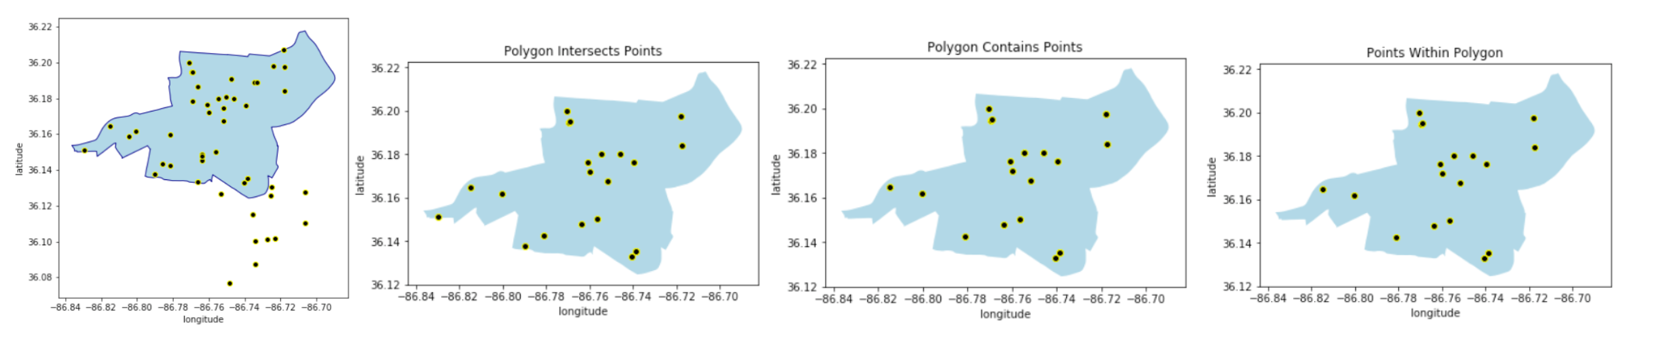
- intersects
- contains 
- within

### Exercise 

**Spatial join practice**

Is there a difference between art (point data) that intersects with neighborhoods (polygon data) and art (point data) within neighborhoods (polygon data)? Explore different spatial joins with the art_geo and neighborhoods GeoDataFrames, which has been pre-loaded for you.

- Write a spatial join to find the art in art_geo that intersects with neighborhoods. Call this art_intersect_neighborhoods and print the .shape property to see how many rows and columns resulted.

In [39]:
# Spatially join art_geo and neighborhoods
art_intersect_neighborhoods = gpd.sjoin(art, neighborhoods, op='intersects')

# Print the shape property of art_intersect_neighborhoods
print(art_intersect_neighborhoods.shape)

(40, 13)


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_25744\3795887377.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  art_intersect_neighborhoods = gpd.sjoin(art, neighborhoods, op='intersects')


- Now write a spatial join to find the art in art_geo that is within neighborhoods. Call this art_within_neighborhoods and take a look at the .shape property to see how many rows and columns resulted.

In [41]:
# Create art_within_neighborhoods by spatially joining art_geo and neighborhoods
art_within_neighborhoods = gpd.sjoin(art, neighborhoods, op = 'within')

# Print the shape property of art_within_neighborhoods
print(art_within_neighborhoods.shape)

(40, 13)


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_25744\1335568258.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  art_within_neighborhoods = gpd.sjoin(art, neighborhoods, op = 'within')


- Finally, write a spatial join to find the art locations in art_geo that contain neighborhoods. Call this GeoDataFrame art_containing_neighborhoods and take a look at the .shape property to see how many rows and columns resulted.

In [43]:
# Spatially join art_geo and neighborhoods and using the contains op
art_containing_neighborhoods = gpd.sjoin(art, neighborhoods, op = 'contains')

# Print the shape property of art_containing_neighborhoods
print(art_containing_neighborhoods.shape)

(0, 13)


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_25744\135090722.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  art_containing_neighborhoods = gpd.sjoin(art, neighborhoods, op = 'contains')


> There are no neighborhood polygons contained within an artworks point location. That's not too surprising is it?

**Finding the neighborhood with the most public art**

Now that you have created art_geo, a GeoDataFrame, from the art DataFrame, you can join it spatially to the neighborhoods data to see what art is in each neighborhood.

- Merge the art_geo and neighborhoods GeoDataFrames with a spatial join to create a new GeoDataFrame called neighborhood_art. Find the art that is within neighborhoods.
- Print the first few rows of the neighborhood art GeoDataFrame.



In [44]:
# Spartially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art, neighborhoods, op='within')

# Print the first few rows
print(neighborhood_art.head())

                                Title Last Name First Name  \
1     [Fourth and Commerce Sculpture]    Walker        Lin   
4                A Story of Nashville    Ridley       Greg   
21                        Chet Atkins     Faxon    Russell   
22  Children's Chairs For The Seasons    McGraw     Deloss   
34                    Foliated Scroll   Bloomer       Kent   

                                             Location  \
1                   333 Commerce Street, Nashville TN   
4                     615 Church Street, Nashville TN   
21  Corner of Fifth Avenue North and Union Street,...   
22                    615 Church Street, Nashville TN   
34                    615 Church Street, Nashville TN   

                                         Medium       Type  \
1                                                Sculpture   
4                      Hammered copper repousse     Frieze   
21  Bronze stool and guitar on a granite plynth  Sculpture   
22                 Mixed Media - woo

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_25744\3035631714.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  neighborhood_art = gpd.sjoin(art, neighborhoods, op='within')


> Now that you have successfully joined art and neighborhoods you can see the title and other information about the artwork along with the name of the neighborhood where it is located. Next you'll do the work to see what art is in which neighborhood!

**Aggregating points within polygons**

Now that you have spatially joined art and neighborhoods, you can group, aggregate, and sort the data to find which neighborhood has the most public art. You can count artwork titles to see how many artworks are in each neighborhood.

- Get just name and title from neighborhood_art and then group by each neighborhood's name (name). Save this as neighborhood_art_grouped
- Aggregate neighborhood_art_grouped to see how many artworks are within each polygon. Use the .agg('count') function to get a count of art in each neighborhood and sort the results with .sort_values(), sorting by title with ascending set to False. Print it.

In [45]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'Title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
print(neighborhood_art_grouped.agg('count').sort_values(by='Title', ascending=False))

                          Title
name                           
Urban Residents              22
Lockeland Springs             3
Edgehill (ONE)                2
Germantown                    2
Hillsboro-West End            2
Inglewood                     2
Sunnyside                     2
Chestnut Hill (TAG)           1
Historic Edgefield            1
McFerrin Park                 1
Renraw                        1
Wedgewood Houston (SNAP)      1


> It looks like most of the public art is in the Urban Residents neighborhood. Next you'll subset neighborhood art and neighborhoods to get only the Urban Residents art and neighborhood.

**Plotting the Urban Residents neighborhood and art**

Now you know that most art is in the Urban Residents neighborhood. In this exercise, you'll create a plot of art in that neighborhood. First you will subset just the urban_art from neighborhood_art and you'll subset the urban_polygon from neighborhoods. Then you will create a plot of the polygon as ax before adding a plot of the art.

- Create a GeoDataFrame called urban_art using the .loc[] accessor to get only the art in the "Urban Residents" neighborhood.
- Use .loc[] again to create a GeoDataFrame called urban_polygon from neighborhoods with only the "Urban Residents" polygon.
- Plot urban_polygon as ax and set color to lightgreen.
- Plot the art in urban_art. Pass three arguments: Set ax = ax to add this plot to the urban_polygon, use type to label the points, and set legend = True.

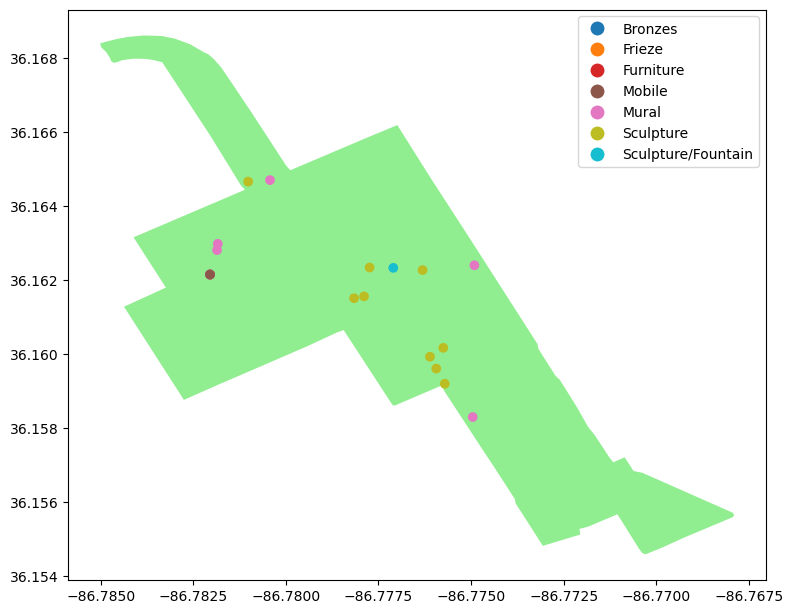

In [46]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == 'Urban Residents']

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax 
ax = urban_polygon.plot(color = 'lightgreen', figsize=(9, 9))

# Add a plot of the urban_art and show it
urban_art.plot( ax = ax, column = 'Type', legend = True);

> Great work! The light green area shows the boundary of the Urban Residents neighborhood and the art locations are color coded by type of work.